# Parseval's theorem relates $\int x(t)^2 dt$ to $\int |X(2\pi f)|^2 df$

In [1]:
import matplotlib
import numpy as np
from numpy.fft import fft
from aesthetics.plotting import *

import matplotlib.pyplot as plt
%matplotlib inline

## Time domain

Create a pink noise signal

In [14]:
npoints = 100000
signal = np.convolve(np.random.randn(npoints), np.exp(-np.linspace(-5,1,1000)), mode='same')
signal /= 100
signal += 5

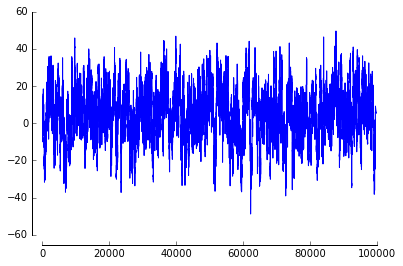

In [15]:
plt.plot(signal)
# plt.xlim([0,100])
adjust_spines(plt.gca())

In [16]:
np.mean(signal)

4.860839895810809

In [17]:
np.var(signal)

181.18999546599113

## Frequency domain

In [21]:
X_f = abs(fft(signal))

In [22]:
len(X_f)

100000

In [25]:
X_f_normalized = X_f/len(X_f)

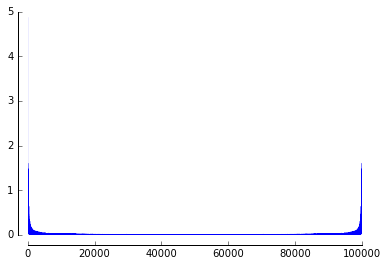

In [26]:
plt.plot(X_f_normalized)
adjust_spines(plt.gca())

In [27]:
X_f_normalized[0]

4.8608398958108099

In [28]:
print('Error of fft mean is %f' %(abs(X_f_normalized[0]-np.mean(signal))))

Error of fft mean is 0.000000


In [31]:
X_f_normalized_one_sided = X_f_normalized[:npoints//2]

In [32]:
len(X_f_normalized_one_sided)

50000

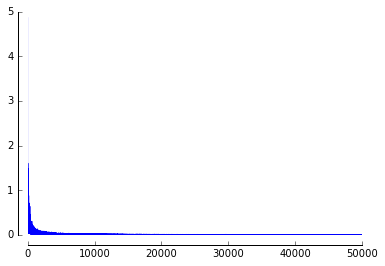

In [33]:
plt.plot(X_f_normalized_one_sided)
adjust_spines(plt.gca())

Naive power spectral density integral

In [34]:
np.sum(X_f_normalized_one_sided**2)

114.22275615645221

2x power spectral density excluding mean

In [37]:
2*np.sum(X_f_normalized_one_sided[1:]**2)

181.18998332749226

In [35]:
np.var(signal)

181.18999546599113

In [38]:
print('Error of fft var is %f' %(abs(2*np.sum(X_f_normalized_one_sided[1:]**2)-np.var(signal))))

Error of fft var is 0.000012


The later is the correct way to compute variance from FFT